In [ ]:
from google.colab import files
uploaded = files.upload()

Saving shopping_behavior_updated.csv to shopping_behavior_updated.csv


In [ ]:
import numpy as np
import pandas as pd
SB = pd.read_csv("shopping_behavior_updated.csv")
SB.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


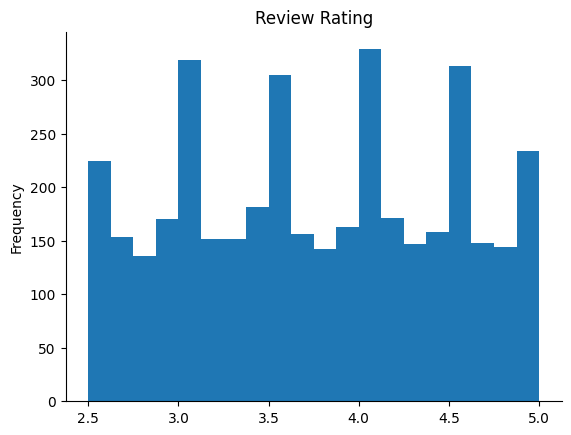

In [ ]:
 # Title Review Rating

from matplotlib import pyplot as plt
SB['Review Rating'].plot(kind='hist', bins=20, title='Review Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

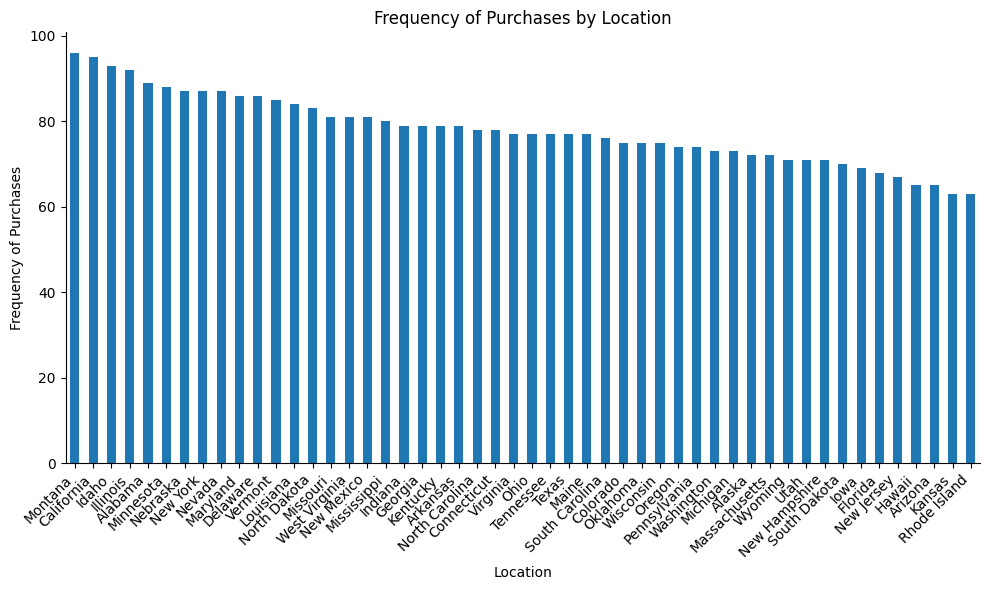

In [ ]:
# Frequency of Purchases vs. Location
location_purchase_counts = SB['Location'].value_counts()
plt.figure(figsize=(10, 6))
location_purchase_counts.plot(kind='bar')
plt.title('Frequency of Purchases by Location')
plt.xlabel('Location')
plt.ylabel('Frequency of Purchases')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

 Handle Missing Values

In [ ]:
SB.fillna({
    'Age': SB['Age'].mean(),
    'Item Purchased': 'Unknown',
    'Category': 'Unknown',
    'Purchase Amount (USD)': SB['Purchase Amount (USD)'].median(),
    # Fill others similarly
}, inplace=True)


 Convert Categorical Variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encode columns like Gender, Location, Season
data = pd.get_dummies(SB, columns=['Gender', 'Location', 'Season', 'Shipping Type'], drop_first=True)

# Label Encode ordinal columns like Review Rating
le = LabelEncoder()
SB['Review Rating'] = le.fit_transform(SB['Review Rating'])
SB['Subscription Status'] = le.fit_transform(SB['Subscription Status'])
SB['Review Rating']
SB['Subscription Status']

,Subscription Status
0,1
1,1
2,1
3,1
4,1
...,...
3895,0
3896,0
3897,0
3898,0


In [ ]:
frequency_mapping = {
    'Daily': 1,
    'Weekly': 7,
    'Fortnightly': 14,
    'Monthly': 30
}
SB['Frequency of Purchases'] = SB['Frequency of Purchases'].map(frequency_mapping)


In [ ]:
SB['Frequency of Purchases'].fillna(SB['Frequency of Purchases'].median(), inplace=True)


<ipython-input-8-40c303203945>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  SB['Frequency of Purchases'].fillna(SB['Frequency of Purchases'].median(), inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases']
SB[numerical_cols] = scaler.fit_transform(SB[numerical_cols])
SB[numerical_cols]

,Age,Purchase Amount (USD),Previous Purchases,Frequency of Purchases
0,0.718913,-0.285629,-0.785831,-0.202295
1,-1.648629,0.178852,-1.616552,-0.202295
2,0.390088,0.558882,-0.162789,-1.290504
3,-1.517099,1.276716,1.637107,-1.290504
4,0.061263,-0.454531,0.391025,-0.202295
...,...,...,...,...
3895,-0.267563,-1.341267,0.460252,-1.290504
3896,0.521618,-0.454531,1.083293,-0.202295
3897,0.127028,-1.130139,-0.093563,-0.202295
3898,-0.004502,0.727784,-0.093563,-1.290504


 Feature Engineering

In [ ]:
SB['Average Purchase Value'] = SB['Purchase Amount (USD)'] / SB['Frequency of Purchases']
SB['Is Promo Used'] = SB['Promo Code Used'].notnull().astype(int)
SB['Is Discount Applied'] = SB['Discount Applied'].notnull().astype(int)
SB['Average Purchase Value']

,Average Purchase Value
0,1.411940
1,-0.884115
2,-0.433073
3,-0.989316
4,2.246868
...,...
3895,1.039336
3896,2.246868
3897,5.586584
3898,-0.563953


In [ ]:
SB

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Average Purchase Value,Is Promo Used,Is Discount Applied
0,1,0.718913,Male,Blouse,Clothing,-0.285629,Kentucky,L,Gray,Winter,...,1,Express,Yes,Yes,-0.785831,Venmo,-0.202295,1.411940,1,1
1,2,-1.648629,Male,Sweater,Clothing,0.178852,Maine,L,Maroon,Winter,...,1,Express,Yes,Yes,-1.616552,Cash,-0.202295,-0.884115,1,1
2,3,0.390088,Male,Jeans,Clothing,0.558882,Massachusetts,S,Maroon,Spring,...,1,Free Shipping,Yes,Yes,-0.162789,Credit Card,-1.290504,-0.433073,1,1
3,4,-1.517099,Male,Sandals,Footwear,1.276716,Rhode Island,M,Maroon,Spring,...,1,Next Day Air,Yes,Yes,1.637107,PayPal,-1.290504,-0.989316,1,1
4,5,0.061263,Male,Blouse,Clothing,-0.454531,Oregon,M,Turquoise,Spring,...,1,Free Shipping,Yes,Yes,0.391025,PayPal,-0.202295,2.246868,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,-0.267563,Female,Hoodie,Clothing,-1.341267,Virginia,L,Turquoise,Summer,...,0,2-Day Shipping,No,No,0.460252,Venmo,-1.290504,1.039336,1,1
3896,3897,0.521618,Female,Backpack,Accessories,-0.454531,Iowa,L,White,Spring,...,0,Store Pickup,No,No,1.083293,Bank Transfer,-0.202295,2.246868,1,1
3897,3898,0.127028,Female,Belt,Accessories,-1.130139,New Jersey,L,Green,Spring,...,0,Standard,No,No,-0.093563,Venmo,-0.202295,5.586584,1,1
3898,3899,-0.004502,Female,Shoes,Footwear,0.727784,Minnesota,S,Brown,Summer,...,0,Express,No,No,-0.093563,Venmo,-1.290504,-0.563953,1,1


 Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'SB' is your processed DataFrame
X = SB.drop('Purchase Amount (USD)', axis=1)  # Features (exclude target variable)
y = SB['Purchase Amount (USD)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

# Now you have X_train, X_test, y_train, and y_test for model training and evaluation.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3120, 20) (780, 20) (3120,) (780,)


In [ ]:
X = SB[['Age', 'Previous Purchases','Frequency of Purchases', 'Average Purchase Value']]
y = SB['Purchase Amount (USD)']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)


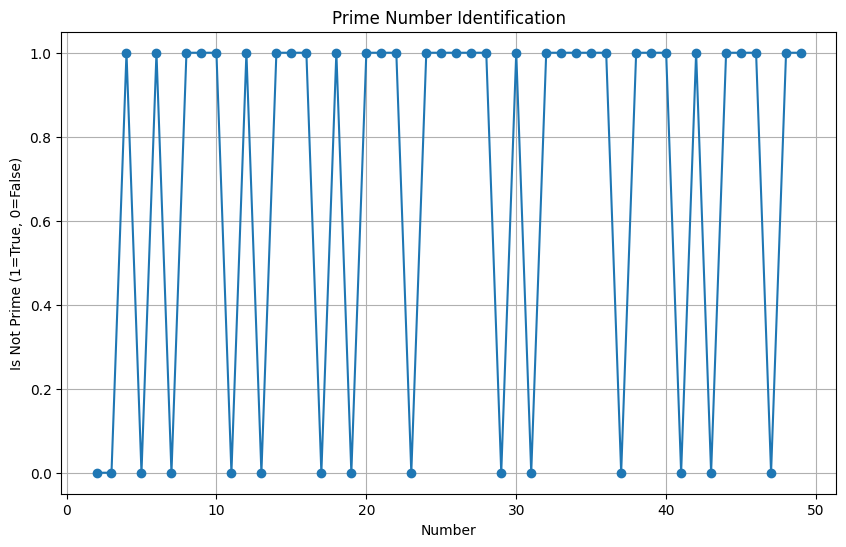

In [ ]:
import matplotlib.pyplot as plt
import math

def is_not_prime(n):
    result = False
    for i in range(2,int(math.sqrt(n)) + 1):
        if n % i == 0:
            result = True
    return result

# Generate data for visualization
numbers = list(range(2, 50))  # Check numbers from 2 to 49
prime_status = [is_not_prime(num) for num in numbers]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(numbers, prime_status, marker='o', linestyle='-')
plt.xlabel("Number")
plt.ylabel("Is Not Prime (1=True, 0=False)")
plt.title("Prime Number Identification")
plt.grid(True)
plt.show()